In [1]:
import controller.ml_controller as ml
MODEL_SAVE_DIR = r'..\data\models\trained'
LOG_DIR = r'..\data\models\logs'
DB_PATH = r"..\data\database.db"

In [2]:
# Aucune des variables ici n'est utilisé. Les valeurs ont été implementées en input des fonctions
# --- Chemins et Noms ---
ANONY_IMAGES_PATH = 'data/reconstructed_pipeline'
MODEL_NAME = 'simple_cnn_lfw_anony_v1'
# --- Paramètres des Données et Prétraitement ---
COLOR_MODE = 'grayscale'
IMG_WIDTH, IMG_HEIGHT, CHANNELS = (100, 100, 1 if COLOR_MODE == 'grayscale' else 3)
# --- Paramètres de Division des Données ---
SPLIT_STRATEGY = 'stratified'
# -- Pour 'stratified' --
TEST_SPLIT_RATIO = 0.2
VALIDATION_SPLIT_RATIO = 0.15
# -- Pour 'fixed_per_subject' --
N_TRAIN_PER_SUBJECT = 16
RANDOM_STATE = 42
# ---    Paramètres du Modèle ---
MODEL_ARCHITECTURE = 'simple_cnn'
# -- Pour Transfer Learning (si MODEL_ARCHITECTURE commence par 'transfer_') --
TRANSFER_BASE_MODEL_NAME = 'MobileNetV2'
TRANSFER_FREEZE_BASE = True
# --- Paramètres d'Entraînement ---
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EARLY_STOPPING_PATIENCE = 10

### Data from folder (LFW dataset)

In [2]:
import os
RECONSTRUCTED_DIR = r"..\data\reconstructed_pipeline"
os.makedirs(RECONSTRUCTED_DIR, exist_ok=True)

X, y, label_encoder = ml.data_loader.load_anonymized_images_flat(
    data_dir=RECONSTRUCTED_DIR,
    img_width=IMG_WIDTH,
    img_height=IMG_HEIGHT,
    color_mode='grayscale'
)

NameError: name 'ml' is not defined

### Data from database

In [3]:
# Get data from db
X, y, label_encoder = ml.get_and_prepare_data(DB_PATH)
input_shape = X[0].shape
print(X.shape)

(467, 100, 100, 3)


Division des données : test_size=0.2, validation_size=0.15
Taille Test: 94 échantillons
Taille Entraînement: 303 échantillons
Taille Validation: 70 échantillons
Construction du modèle CNN simple avec input_shape=(100, 100, 3) et num_classes=43
Modèle CNN simple construit.



Epoch 1: val_accuracy improved from -inf to 0.04286, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 2: val_accuracy improved from 0.04286 to 0.05714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 3: val_accuracy did not improve from 0.05714

Epoch 4: val_accuracy improved from 0.05714 to 0.07143, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 5: val_accuracy improved from 0.07143 to 0.12857, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 6: val_accuracy improved from 0.12857 to 0.15714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 7: val_accuracy improved from 0.15714 to 0.18571, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 8: val_accuracy did not improve from 0.18571

Epoch 9: val_accuracy did not improve from 0.18571

Epoch 10: val_accuracy did not improve from 0.18571

Epoch 11: val_accuracy did not improve from 0.18571

Epoch 12: val_accuracy did not improve from 0.18571

Epoch 13: val_accuracy did not improve from 0.18571

Epoch 14: val_accuracy did not improve from 0.18571

Epoch 15: val_accuracy did not improve from 0.18571

Epoch 16: val_accuracy did not improve from 0.18571

Epoch 17: val_accuracy improved from 0.18571 to 0.20000, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 18: val_accuracy did not improve from 0.20000

Epoch 19: val_accuracy improved from 0.20000 to 0.25714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 20: val_accuracy improved from 0.25714 to 0.27143, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 21: val_accuracy improved from 0.27143 to 0.32857, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 22: val_accuracy improved from 0.32857 to 0.34286, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 23: val_accuracy did not improve from 0.34286

Epoch 24: val_accuracy did not improve from 0.34286

Epoch 25: val_accuracy did not improve from 0.34286

Epoch 26: val_accuracy did not improve from 0.34286

Epoch 27: val_accuracy did not improve from 0.34286

Epoch 28: val_accuracy did not improve from 0.34286

Epoch 29: val_accuracy improved from 0.34286 to 0.41429, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 30: val_accuracy did not improve from 0.41429

Epoch 31: val_accuracy improved from 0.41429 to 0.44286, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 32: val_accuracy did not improve from 0.44286

Epoch 33: val_accuracy improved from 0.44286 to 0.45714, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 34: val_accuracy did not improve from 0.45714

Epoch 35: val_accuracy did not improve from 0.45714

Epoch 36: val_accuracy did not improve from 0.45714

Epoch 37: val_accuracy did not improve from 0.45714

Epoch 38: val_accuracy did not improve from 0.45714

Epoch 39: val_accuracy did not improve from 0.45714

Epoch 40: val_accuracy did not improve from 0.45714

Epoch 41: val_accuracy improved from 0.45714 to 0.47143, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 42: val_accuracy did not improve from 0.47143

Epoch 43: val_accuracy did not improve from 0.47143

Epoch 44: val_accuracy did not improve from 0.47143

Epoch 45: val_accuracy did not improve from 0.47143

Epoch 46: val_accuracy did not improve from 0.47143

Epoch 47: val_accuracy improved from 0.47143 to 0.51429, saving model to ..\data\models\trained\simple_cnn_lfw_anony_v1.h5



Epoch 48: val_accuracy did not improve from 0.51429

Epoch 49: val_accuracy did not improve from 0.51429

Epoch 50: val_accuracy did not improve from 0.51429
Restoring model weights from the end of the best epoch: 47.
LabelEncoder sauvegardé dans : ..\data\models\trained\simple_cnn_lfw_anony_v1_label_encoder.joblib
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3949 - loss: 2.1615
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

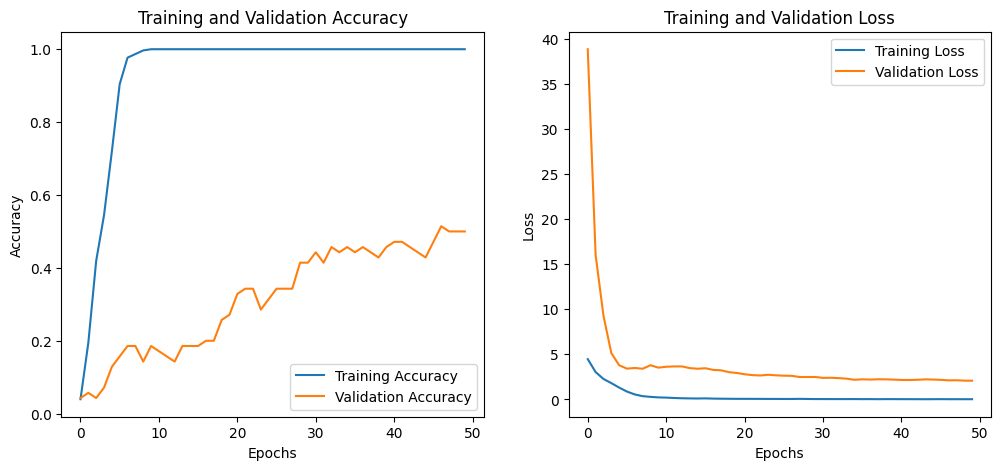

In [4]:
# Create the model
model = ml.train_model(X, y, label_encoder, input_shape=input_shape, model_save_dir=MODEL_SAVE_DIR, log_dir=LOG_DIR)

In [5]:
print(f"summary_text: {model['summary_text']}")
print(f"duration: {model['duration']}")
print(f"evaluation: {model['evaluation']}")
print(f"training_plot: {model['training_plot']}") # .show()

summary_text: Model: "simple_cnn"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 100, 100, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 100, 100, 32)   │           128 │
├─────────────────────────────────┼───────

In [9]:
# Image to predict
index = 30

img_to_predict = X[index]
true_result = y[index]
print(img_to_predict.shape)

# Make a prediction
prediction = ml.predict_image(img_to_predict, model_save_dir=MODEL_SAVE_DIR)

# Result
print(f"prediction: {prediction}")
print(f"true_result: {true_result}")
print(f"The model is correct: {prediction==true_result}")

LabelEncoder chargé depuis : ..\data\models\trained\simple_cnn_lfw_anony_v1_label_encoder.joblib
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
prediction: 18
true_result: 2
The model is correct: False
